In [1]:
import altair as alt
import pandas as pd

In [2]:
df_NLI_6 = pd.DataFrame({
    'NLI': ['2', '1', '0', '-1', '-2', '<-2'],
    'N': [2, 3, 3, 4, 3, 1],
})

In [3]:
df_NLI_6['Percent']=df_NLI_6["N"]/df_NLI_6["N"].sum()*100
df_NLI_6

,NLI,N,Percent
0,2,2,12.50
1,1,3,18.75
2,0,3,18.75
3,-1,4,25.00
4,-2,3,18.75
5,<-2,1,6.25


In [4]:
df_NLI_12 = pd.DataFrame({
    'NLI': ['2', '1', '0', '-1', '-2', '<-2'],
    'N': [1, 5, 3, 4, 1, 1],
})

In [5]:
df_NLI_12['Percent']=df_NLI_12["N"]/df_NLI_12["N"].sum()*100
df_NLI_12

,NLI,N,Percent
0,2,1,6.666667
1,1,5,33.333333
2,0,3,20.000000
3,-1,4,26.666667
4,-2,1,6.666667
5,<-2,1,6.666667


In [6]:
df_NLI_24 = pd.DataFrame({
    'NLI': ['2', '1', '0', '-1', '-2', '<-2'],
    'N': [1, 2, 5, 1, 1, 1],
})

In [7]:
df_NLI_24['Percent']=df_NLI_24["N"]/df_NLI_24["N"].sum()*100
df_NLI_24

,NLI,N,Percent
0,2,1,9.090909
1,1,2,18.181818
2,0,5,45.454545
3,-1,1,9.090909
4,-2,1,9.090909
5,<-2,1,9.090909


In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

In [19]:
for i, df in enumerate([df_NLI_6, df_NLI_12]):    
    print(i)
    print(df)

0
   NLI  N  Percent
0    2  2    12.50
1    1  3    18.75
2    0  3    18.75
3   -1  4    25.00
4   -2  3    18.75
5  <-2  1     6.25
1
   NLI  N    Percent
0    2  1   6.666667
1    1  5  33.333333
2    0  3  20.000000
3   -1  4  26.666667
4   -2  1   6.666667
5  <-2  1   6.666667


In [26]:
from pathlib import Path

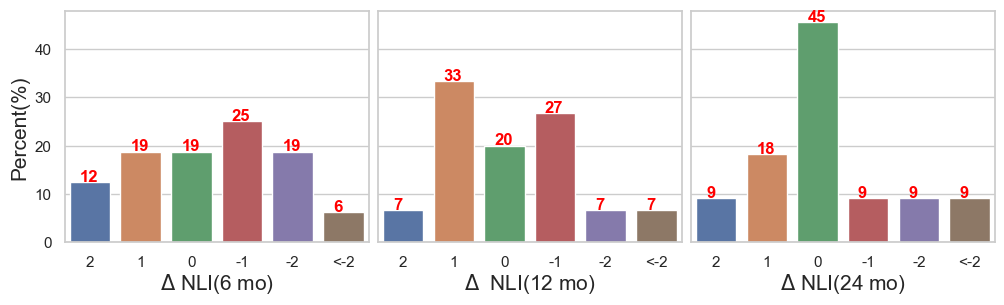

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
#fig.suptitle('Initial Pokemon - 1st Generation')
data_path = Path("./nli.png")
X_LABELS = [r"$\Delta$ NLI(6 mo)",r"$\Delta$  NLI(12 mo)", r"$\Delta$ NLI(24 mo)"]
for i, df in enumerate([df_NLI_6, df_NLI_12,df_NLI_24]):
    ax_i = axes[i]
    sns.barplot(ax=ax_i, data=df,x="NLI", y="Percent", )
    #axes[0].set_title(bulbasaur.name)
    ax_i.set_xlabel(X_LABELS[i], fontsize=15, labelpad=1)
    if i == 0:
        ax_i.set_ylabel("Percent(%)", fontsize=15)
    else:
        ax_i.set_ylabel("")
        
    total = len(df)
    for j,p in enumerate(ax_i.patches):
        percentage = f'{df.loc[j, "Percent"]:1.0f}'
        x = p.get_x() + p.get_width() / 2 - 0.2
        y = p.get_y() + p.get_height() + 0.2
        ax_i.annotate(percentage, (x, y), size = 12, color="red", fontweight="bold")
        
fig.subplots_adjust(wspace=0.03)
plt.savefig(data_path, bbox_inches='tight')
plt.show()
plt.close()